# **Students Performance in Exams**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Objetives**
1. Analyze students' performance in exams based on various factors.
2. Identify patterns and correlations between demographic attributes and scores.
3. Compare the impact of parental education, lunch type, and test preparation on student results.
4. Visualiza the distribution of scores using statistical and graphical methods.
5. Provide insights that could help educators improve student outcomes.

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('./data/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## **Key Questions**

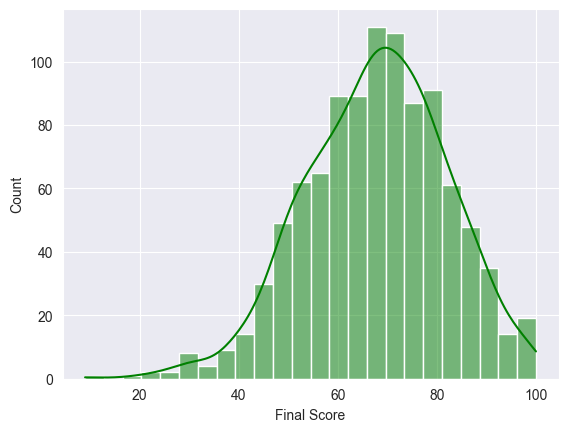

In [21]:
# What is the overall distribution of students' exam scores?
df['Final Score'] = round((df['math score'] + df['reading score'] + df['writing score']) / 3, 2)
sns.histplot(data=df, x='Final Score', color='green', alpha=.5, kde=True)
plt.show()

[Text(0, 0, '69.5695'), Text(0, 0, '65.8373')]

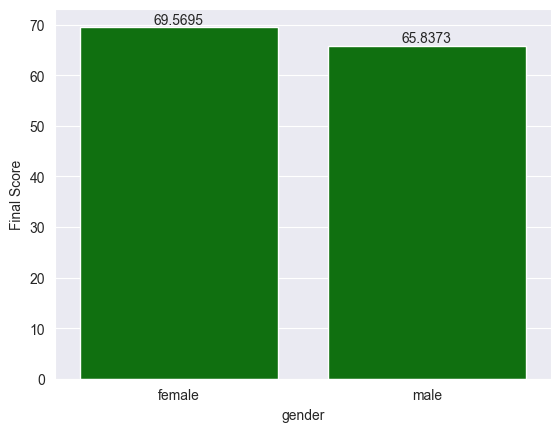

In [7]:
# Are there significant performance differences between male and female students?
ax = sns.barplot(data=df, x='gender', y='Final Score', estimator=np.mean, color='green', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)

In [8]:
# How does parental education level influence students' test results?
df['parental level of education'] = df['parental level of education'].replace({
    "some high school" : "High School",
    "bachelor's degree" : "Bachelor's Degree",
    "some college" : "College",
    "master's degree" : "Master's Degree",
    "associate's degree" : "Associate Degree",
    "high school" : "High School",
})

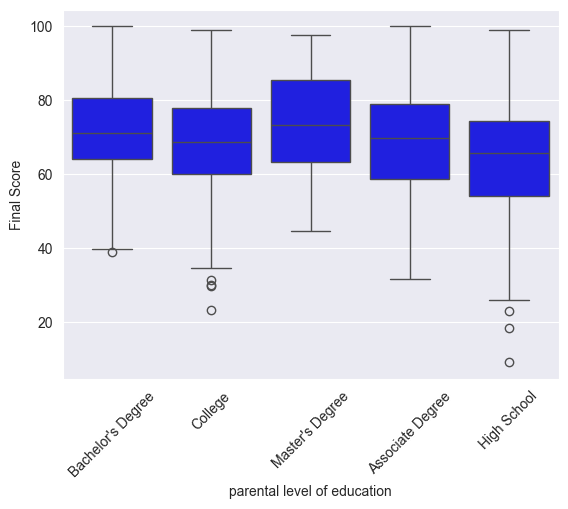

In [9]:
sns.boxplot(data=df, x='parental level of education', y='Final Score', color='blue')
plt.xticks(rotation=45)
plt.show()

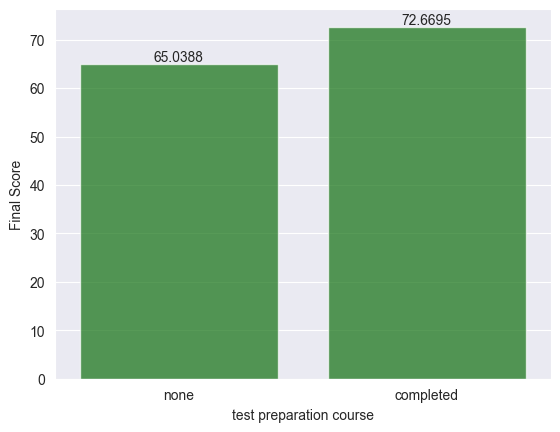

In [10]:
# Do students who complete a test preparation course perform better?
ax = sns.barplot(data=df, x='test preparation course', y='Final Score', color='green', alpha=.7, errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

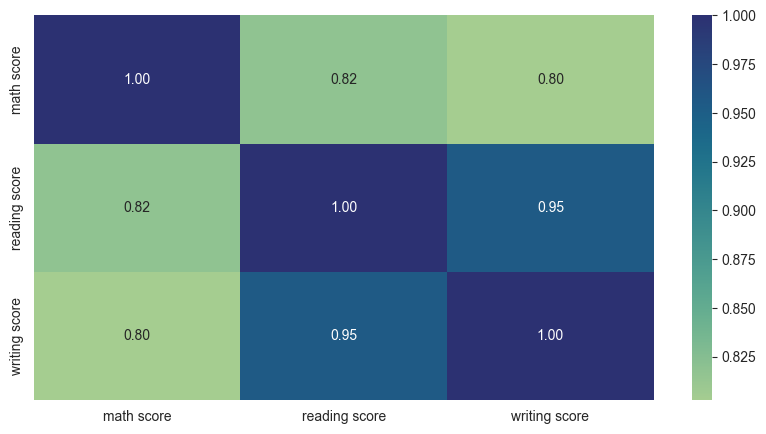

In [11]:
# Is there a correlation between math, reading, and writing scores?
plt.figure(figsize=(10, 5))
sns.heatmap(data=df[['math score', 'reading score', 'writing score']].corr(), annot=True, fmt='.2f', cmap='crest')
plt.show()

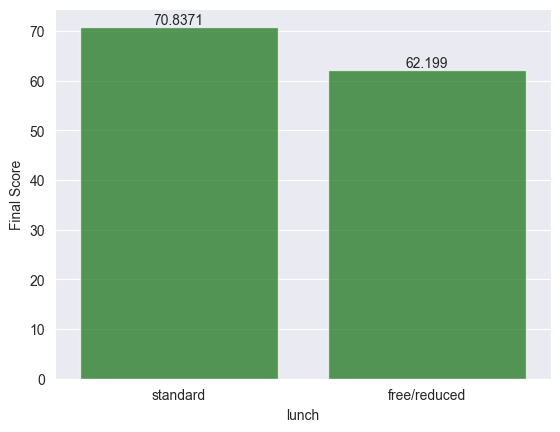

In [12]:
# Does lunch type (standard vs. free/reduced) affect student performance?
ax = sns.barplot(data=df, x='lunch', y='Final Score', color='green', alpha=.7, errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()